In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
import matplotlib.pyplot as plt

In [3]:
titanic_data = pd.read_csv('/Users/josecuellargonzalez/Documents/titanic.csv')
#assiging the titanic data

In [4]:
true_survived = titanic_data['Survived']
# This is a data frame that only contains wether or not a passenger survives in 0( died) or 1(survived)

In [5]:
dummies = pd.get_dummies(titanic_data.Sex)
titanic_data = pd.concat([titanic_data,dummies],axis = 'columns')
# These are dummy variables and they make columns for the categorical variables (male and female), but we'll 
# need to drop one of em to avoid the dummy trap


In [6]:
del titanic_data['Cabin']
# Delete 'Cabin data because it's not neccessary for decision tree

In [7]:
titanic_data = titanic_data.dropna(subset = ['Age'])
# This drops this the rows where age column has a missing value

In [8]:
len(titanic_data)
new_index = range(0,714,1)
# Since we removed a lot of rows that removed, the index is whack and we need a new one in numeric order and no gaps


In [9]:
survived = titanic_data['Survived']
#true survived wont work with decision tree later on b/c we removed a bunch a rows now and wont fit on the model

In [10]:
titanic_data['new_index'] = new_index


In [11]:
titanic_data.set_index('new_index',inplace = True)
#now the new_index is the real index

In [12]:
def age_specific(age):
    if(age > 0 and age <= 4 ):
        return "Infant"
    if( age > 4 and age <= 12 ):
        return "Child"
    if( age > 12 and age <= 19):
        return "Teenager"
    if( age > 19 and age <= 35):
        return "Young Adult"
    if( age >35 and age <= 55):
        return "Older Adult"
    if( age > 55):
        return 'Elderly'
## Lets divide the age groups more into infant,child,teenager,young adult, older adult, and elderly
    


In [13]:
titanic_ages = titanic_data.Age
titanic_agegroups = titanic_ages.apply(age_specific)

In [14]:
titanic_data['Age_Summary'] = titanic_agegroups
## we have inserted the categorical data, that'll we'll use LabelEncoder on to assign

In [15]:
l_encode = LabelEncoder()


In [16]:
titanic_data['2nd_Age'] = titanic_data.Age_Summary
## I made a second identical column to Age_Summary to compare how it get label encoded

In [17]:
titanic_data.Age_Summary = l_encode.fit_transform(titanic_data.Age_Summary)


In [18]:
def transformation(num):
    if(num == 2):
        return 1
    if(num == 0):
        return 2
    if(num == 4):
        return 3
    if(num == 5):
        return 4
    if(num == 3):
        return 5
    if(num == 1):
        return 6

In [19]:
titanic_data.Age_Summary = titanic_data.Age_Summary.apply(transformation)
# the encoder did not encode it the way I liked, infant being 1 and elder being 6, so I made a function to transform 
# the values it gave to the age groups

In [20]:
del titanic_data['male']
del titanic_data['Ticket']
del titanic_data['SibSp']
del titanic_data['Parch']
del titanic_data['Embarked']
del titanic_data['2nd_Age']

# removing columns that wont help with our decision tree, and male column to ignore the dummy variable trap
#except for Name

In [21]:
del titanic_data['Sex']
# forgot to delete sex column

In [22]:
titanic_data
## lets make a decision tree to predict survivability based on Pclass,sex,age, and fare

,PassengerId,Survived,Pclass,Name,Age,Fare,female,Age_Summary
new_index,,,,,,,,
0,1,0,3,"Braund, Mr. Owen Harris",22.0,7.2500,0,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,71.2833,1,5
2,3,1,3,"Heikkinen, Miss. Laina",26.0,7.9250,1,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,53.1000,1,4
4,5,0,3,"Allen, Mr. William Henry",35.0,8.0500,0,4
5,7,0,1,"McCarthy, Mr. Timothy J",54.0,51.8625,0,5
6,8,0,3,"Palsson, Master. Gosta Leonard",2.0,21.0750,0,1
7,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,11.1333,1,4
8,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,30.0708,1,3


In [23]:
input_values = titanic_data.drop(['PassengerId','Name'],axis = 'columns')
# these are the input values for the decision tree

In [24]:
input_values.reset_index(inplace = True)

In [25]:
del input_values['new_index']

In [26]:
survival = input_values['Survived']
# Make whole new data set with only 1s or 0s if somebody survived

In [27]:
del input_values['Survived']

In [28]:
values_train, values_test,survival_train,survival_test = train_test_split(input_values,survival,test_size = 0.2, 
                                                                          random_state = 10)

In [29]:
tree = tree.DecisionTreeClassifier(criterion = 'entropy')

In [30]:
tree.fit(values_train,survival_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [31]:
input_values['Fare'].mean()
#Gets average Fare price

34.69451400560218

In [32]:
tree.predict([[3,2,40,1,1]])
# The input order for the decision tree is: 1) pclass(1,2,3), 2) age, 3) Fare, 4)female(1,0),and 5) age_summary 
#(1 == infant(1 - 4), 2 == child(5-12), 3 == teenager(13-19), 4 == young adult(20-35) ,5 == older adult(35-55),
#6 == elederly(55+))

array([0])

In [33]:
tree.score(values_test,survival_test)
## This tells the accuracy of the model

0.7972027972027972

In [34]:
new_data = pd.concat([input_values,survival],axis = 1)
new_data
# data for visualizations that includes Survived column

,Pclass,Age,Fare,female,Age_Summary,Survived
0,3,22.0,7.2500,0,4,0
1,1,38.0,71.2833,1,5,1
2,3,26.0,7.9250,1,4,1
3,1,35.0,53.1000,1,4,1
4,3,35.0,8.0500,0,4,0
5,1,54.0,51.8625,0,5,0
6,3,2.0,21.0750,0,1,0
7,3,27.0,11.1333,1,4,1
8,2,14.0,30.0708,1,3,1
9,3,4.0,16.7000,1,1,1


In [35]:
age_survival = new_data[['Age','Survived']][new_data.Survived == 1]
age_death = new_data[['Age','Survived']][new_data.Survived == 0]
# makes data set of age of people who lived and died

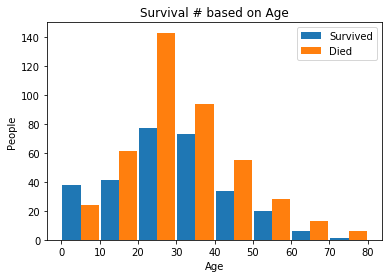

In [36]:
plt.title("Survival # based on Age")
plt.hist([age_survival['Age'],age_death['Age']],bins = [0,10,20,30,40,50,60,70,80],rwidth =.95,label = ['Survived','Died'])
plt.xlabel('Age')
plt.ylabel('People')
plt.legend()

In [37]:
male_survival = new_data['Survived'][new_data.female == 0][new_data.Survived == 1]
female_survival = new_data['Survived'][new_data.female == 1][new_data.Survived == 1]
# gives sets of amout of people survived in that gender

In [38]:
x = len(male_survival)
x
# gives amount of male survivors

93

In [39]:
y = len(female_survival)
y
# gives amount of female survivors

197

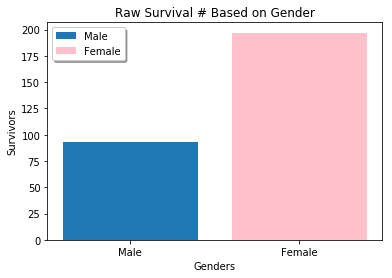

In [40]:
plt.title('Raw Survival # Based on Gender')
plt.xlabel('Genders')
plt.ylabel('Survivors')
plt.bar('Male',x, label = 'Male')
plt.bar('Female', y, color = 'pink',label = 'Female')
plt.legend(shadow = True)

In [41]:
class_1_survive = new_data['Survived'][new_data.Pclass == 1][new_data.Survived == 1]
class_2_survive = new_data['Survived'][new_data.Pclass == 2][new_data.Survived == 1]
class_3_survive = new_data['Survived'][new_data.Pclass == 3][new_data.Survived == 1]

In [42]:
s_class_1 = len(class_1_survive)
s_class_2 = len(class_2_survive)
s_class_3 = len(class_3_survive)

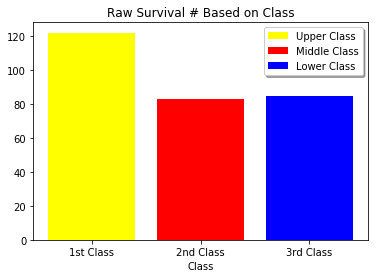

In [43]:
plt.title('Raw Survival # Based on Class')
plt.xlabel("Class")
plt.bar('1st Class',s_class_1,label = 'Upper Class',color = 'yellow')
plt.bar('2nd Class',s_class_2,label = 'Middle Class',color = 'r')
plt.bar('3rd Class',s_class_3,label = 'Lower Class',color = 'b')
plt.legend(shadow = True)

,Pclass,Age,Fare,female,Age_Summary
0,3,22.0,7.2500,0,4
1,1,38.0,71.2833,1,5
2,3,26.0,7.9250,1,4
3,1,35.0,53.1000,1,4
4,3,35.0,8.0500,0,4
5,1,54.0,51.8625,0,5
6,3,2.0,21.0750,0,1
7,3,27.0,11.1333,1,4
8,2,14.0,30.0708,1,3
9,3,4.0,16.7000,1,1
